In [1]:
# clear all the variables
%reset -f

In [62]:
# import the relevant libraries
import pandas as pd
import numpy as np
import quandl as ql
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import norm

# for debugging, uncomment the following line
#from IPython.core.debugger import Tracer as tr
# to call trace, tr()()

In [74]:
# setup
token = 'foo'

# function to print a simple df description
def dataframeSummary(df, title=''):
    # data summary + bof, eof check
    print("data summary:\n {0} \n".format(df.describe()))
    print("sample:\n {0}".format(pd.concat([df.head(5), df.tail(5)])))
    plt.plot(df)
    plt.title(title)
    plt.show()
    
    return

In [75]:
# population growth rate for senegal in %
temp1 = ql.get('FRED/SPPOPGROWSEN', authtoken=token)

# gross domestic product in $
temp2 = ql.get('FRED/MKTGDPSNA646NWDB', authtoken=token)
#dataframeSummary(df1, 'population growth rate for senegal in %')
#dataframeSummary(df2, 'gross domestic product in $')

data summary:
              GDP        Pop
count  56.000000  56.000000
mean    0.052222   0.028033
std     0.116114   0.002125
min    -0.381632   0.023838
25%    -0.011216   0.026537
50%     0.041242   0.028532
75%     0.106236   0.029855
max     0.346735   0.030665 

sample:
                  GDP       Pop
Date                          
1961-01-01  0.053616  0.027237
1962-01-01  0.024716  0.027409
1963-01-01  0.033219  0.027629
1964-01-01  0.057817  0.027916
1965-01-01  0.017614  0.028244
2012-01-01 -0.011618  0.029820
2013-01-01  0.041958  0.029963
2014-01-01  0.033070  0.029709
2015-01-01 -0.117635  0.029192
2016-01-01  0.081488  0.028606


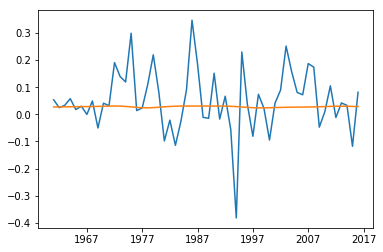

In [79]:
df = pd.DataFrame()

temp2['Log'] = np.log(temp2['Value'])
df['GDP'] = temp2['Log'] - temp2['Log'].shift(1)
df['Pop'] = temp1['Value'] / 100
df = df.dropna(how='any')
dataframeSummary(df)


In [80]:
# run the linear regression model. smf allows some syntaxic sugar...
mod = smf.ols(formula='GDP~Pop', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.1404
Date:                Sat, 29 Jul 2017   Prob (F-statistic):              0.709
Time:                        15:40:25   Log-Likelihood:                 41.695
No. Observations:                  56   AIC:                            -79.39
Df Residuals:                      54   BIC:                            -75.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1302      0.209      0.624      0.5

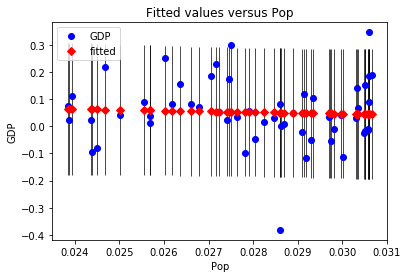

In [78]:
# plot the results
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(res, 1, ax=ax)
ax.set_ylabel('GDP')
ax.set_xlabel('Pop')
plt.show()